In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')


In [5]:
df = pd.read_csv("/content/IMDb Movies India.csv",encoding='latin-1')

In [6]:
df.sample(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
10183,Night Lover,(2006),NaN,"Drama, Thriller",NaN,NaN,Suresh Jain,Tanveer,Urmila,Ashika Suryavanshi
12613,Savera,(1972),NaN,Drama,NaN,NaN,V.K. Sharma,Sajid Khan,Abhi Bhattacharya,Anil Dhawan
3686,Dhake Ki Malmal,(1956),NaN,"Comedy, Drama",NaN,NaN,J.K. Nanda,Madhubala,Rajan Haksar,Jagdeep
12647,School Master,(1958),185 min,NaN,7.0,18,B. Ramakrishnaiah Panthulu,B. Ramakrishnaiah Panthulu,M.V. Rajamma,Dikki Madhava Rao
2159,Bhalevadivi Basu,(2001),156 min,"Family, Comedy",4.6,35,P.A. Arun Prasad,Nandamuri Balakrishna,Anjala Zaveri,Shilpa Shetty Kundra
10348,One Two Three,(2008),135 min,"Comedy, Crime",5.3,"2,511",Ashwani Dhir,Tusshar Kapoor,Sunil Shetty,Paresh Rawal
8843,Man-Mauji,(1962),141 min,"Comedy, Musical",7.1,39,R. Krishnan,S. Panju,Kishore Kumar,Sadhana
469,Aas Aur Pyaas,(1983),NaN,Drama,NaN,NaN,K.C. Agarwal,Girish Karnad,Nutan,Rameshwari
764,Ajnabi,(1966),NaN,Thriller,NaN,NaN,Chandrashekhar,Mohan Choti,Iftekhar,Zeb Rehman
3600,Delhi Mere Baap Ki,(2018),NaN,NaN,NaN,NaN,Shashi Pal,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [8]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [9]:
#now removing null values
df = df.dropna(subset =["Year","Genre","Director","Rating","Actor 1","Actor 2","Actor 3"])

In [10]:
df=df.dropna().reset_index(drop=True)

In [11]:
df.shape

(5659, 10)

In [12]:
#converting column of duration and votes to integer
df['Duration']=df.loc[:,'Duration'].str.replace('min','')
df['Duration']=pd.to_numeric(df.loc[:,'Duration'])

In [13]:
df['Votes']=df.loc[:,'Votes'].str.replace(',','')
df['Votes']=pd.to_numeric(df.loc[:,'Votes'])

In [14]:
df.shape

(5659, 10)

In [15]:
df.duplicated(subset=['Name','Year']).sum()

2

In [16]:
df=df.drop_duplicates(keep='first',subset=["Name","Year"]).reset_index(drop=True)

In [17]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [18]:
#now we will clean genre and year column and adding new genre column for more analysis
df["Year"] = df.loc[:,"Year"].str.extract(r"(\d{4})")
df["Year"] = pd.to_numeric(df.loc[:,"Year"])

In [19]:
df["Genre"]=df.loc[:,"Genre"].str.replace("Musical","Music")

In [20]:
df["Main_genre"] = df.loc[:,"Genre"].str.extract("(^\w{1,11})")

In [21]:
df["Main_genre"].unique()

array(['Drama', 'Comedy', 'Horror', 'Action', 'Crime', 'Thriller',
       'Adventure', 'Sport', 'Biography', 'Documentary', 'Mystery',
       'Music', 'Romance', 'Fantasy', 'Sci', 'Family', 'History',
       'Animation', 'War'], dtype=object)

In [22]:
#removing outliers by zscore method
df.describe()

,Year,Duration,Rating,Votes
count,5657.000000,5657.00000,5657.000000,5657.00000
mean,1996.254198,133.44087,5.897967,2698.59802
std,19.729583,25.32374,1.381035,13653.82378
min,1931.000000,21.00000,1.100000,5.00000
25%,1983.000000,119.00000,5.000000,30.00000
50%,2002.000000,135.00000,6.100000,131.00000
75%,2013.000000,150.00000,6.900000,923.00000
max,2021.000000,321.00000,10.000000,591417.00000


In [23]:
df=df[(np.abs(stats.zscore(df[['Rating','Votes','Duration']])) < 3).all(axis=1)]

In [24]:
df.shape

(5545, 11)

In [25]:
#now we do univariate analysis
iplot(px.violin(data_frame=df,x="Rating"))

In [26]:
iplot(px.violin(data_frame=df,x="Duration"))

In [27]:
iplot(px.violin(data_frame=df,x="Votes"))

In [28]:
df.Genre.value_counts().reset_index()

,Genre,count
0,Drama,833
1,"Drama, Romance",325
2,"Action, Crime, Drama",324
3,"Action, Drama",202
4,"Comedy, Drama",198
...,...,...
355,"History, Romance",1
356,"Drama, History, Sport",1
357,"Animation, Comedy, Drama",1
358,"Family, Drama, Thriller",1


In [29]:
genres = df.Main_genre.value_counts().reset_index()
iplot(px.pie(data_frame=genres,names=genres.Main_genre,values=genres["count"],title="Number of movies by Genre",height=1000)\
      .update_traces(textinfo="value+percent"))

In [30]:
df.groupby("Main_genre")["Rating"].mean().sort_values(ascending = False)

Main_genre
Documentary    7.566667
History        7.225000
Biography      6.598701
Sci            6.325000
Family         6.296154
Fantasy        6.251613
Drama          6.243574
Adventure      6.132673
Music          6.121111
Crime          6.092075
Animation      6.072500
Mystery        5.815517
Comedy         5.808368
Sport          5.800000
Romance        5.589809
Action         5.509474
Thriller       5.332584
Horror         4.688976
War            4.333333
Name: Rating, dtype: float64

In [31]:
rating_by_genre = df.groupby("Main_genre")["Rating"].mean().sort_values(ascending = False)
iplot(px.bar(data_frame = rating_by_genre))

In [32]:
movies_by_year = df["Year"].value_counts().reset_index().sort_values(by="Year")

iplot(px.line(data_frame=movies_by_year,x="Year",y="count",title="Number of Movies over the years",\
              color_discrete_sequence=["green"]))

In [33]:
#rating and number of votes  by all years
Rating_by_years = df.groupby("Year").agg({"Rating":"mean","Votes":"sum"}).reset_index()

In [34]:
iplot(px.line(data_frame=Rating_by_years,x="Year",y="Rating",markers=True,color_discrete_sequence=["green"],height=400))

In [35]:
iplot(px.line(data_frame=Rating_by_years,x="Year",y="Votes",color_discrete_sequence=["Red"],markers=True,height=400))

In [36]:
def top_10_rating(col):
  return df.groupby(col)["Rating"].agg(["mean","count"])\
  .query("count >=10")\
  .sort_values(by="mean",ascending=False)[:10]\
  .reset_index()

In [37]:
top_10_director = top_10_rating("Director")

iplot(px.bar(data_frame=top_10_director,x="Director",y="mean",text="count",labels= {"mean":"Rating","count":"Number of movies"},\
            title="Top 10 Directors with more than 10 movies by rating"))

In [38]:
top_10_actors1 = top_10_rating("Actor 1")
iplot(px.bar(data_frame=top_10_actors1,x="Actor 1",y= "mean",text="count",\
             labels={"Actor 1":"Main Actor","mean":"Rating","count":"Number of movies"},\
             title="Top 10 main actors with more than 10 movies by rating"))

In [39]:
top_10_actors2= top_10_rating("Actor 2")

iplot(px.bar(data_frame = top_10_actors2,x="Actor 2",y="mean",text="count",labels={"mean":"Rating","count":"Number of movies"},\
             title="top 10 secondary actors with more than 10 movies by Rating"))

In [40]:
top_10_actors3 = top_10_rating("Actor 3")

iplot(px.bar(data_frame=top_10_actors3,x="Actor 3",y="mean",text="count",labels = {'mean':'Rating','count':'Number of movies'},\
            title="Top 10 Third main actors with more than 10 movies by rating"))

In [41]:
from re import A
from sklearn.model_selection import train_test_split,cross_val_score
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingClassifier,RandomForestRegressor
from sklearn.preprocessing import RobustScaler,StandardScaler,MaxAbsScaler,MinMaxScaler
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
import sklearn.metrics as metrics

In [32]:
#something happend and scikitplot and ce dont run

In [44]:
!pip install scikit-plot
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc


In [42]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.8 MB/s eta 0:00:00


In [45]:
import scikitplot as skplt
import category_encoders as ce

In [46]:
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred)
    mse=metrics.mean_squared_error(y_true, y_pred)
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('Median absolute error: ',round(median_absolute_error,4))

In [48]:
df = df.drop(columns=["Name","Main_genre"])

In [49]:
x = df.drop(columns="Rating")
y = df["Rating"]

In [50]:
x

,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
0,2019,109,Drama,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,2019,110,"Comedy, Romance",35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,1997,147,"Comedy, Drama, Music",827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,2005,142,"Drama, Romance, War",1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,2012,82,"Horror, Mystery, Thriller",326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...
5652,2015,115,Drama,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
5653,2001,153,"Biography, Drama, History",1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
5654,1989,125,"Action, Crime, Drama",44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
5655,1999,129,"Action, Drama",655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [51]:
encoder = ce.JamesSteinEncoder(return_df=True)

In [55]:
encoder.fit(x,y)
x = encoder.transform(x.loc[:,:])

In [56]:
x

,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
0,2019,109,6.190741,8,7.000000,6.827112,7.000000,7.000000
1,2019,110,5.792333,35,4.400000,5.598501,4.400000,4.453861
2,1997,147,5.978972,827,5.590219,5.246126,5.774658,5.878363
3,2005,142,6.401041,1086,7.173496,5.653301,6.702394,6.198561
4,2012,82,5.706343,326,5.600000,5.600000,5.884089,5.600000
...,...,...,...,...,...,...,...,...
5652,2015,115,6.190741,408,6.100000,6.126083,6.100000,5.852186
5653,2001,153,6.570957,1496,6.968314,5.248634,5.844167,5.789483
5654,1989,125,5.801954,44,6.203445,6.208974,5.800000,6.016249
5655,1999,129,5.676591,655,5.375500,5.582148,4.911970,5.803593


In [57]:
scaler = RobustScaler()
scaler.fit(x)
x.loc[:,:] = scaler.transform(x.loc[:,:])

In [58]:
x

,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
0,0.580645,-0.838710,0.625425,-0.141657,1.049219,1.058406,1.166050,1.244936
1,0.580645,-0.806452,-0.167667,-0.109244,-1.479828,-0.378927,-1.662776,-1.689504
2,-0.129032,0.387097,0.203867,0.841537,-0.322090,-0.791165,-0.167134,-0.047758
3,0.129032,0.225806,1.044060,1.152461,1.217981,-0.314818,0.842252,0.321273
4,0.354839,-1.709677,-0.338843,0.240096,-0.312576,-0.377173,-0.048072,-0.368572
...,...,...,...,...,...,...,...,...
5652,0.451613,-0.645161,0.625425,0.338535,0.173780,0.238283,0.186841,-0.077927
5653,0.000000,0.580645,1.382303,1.644658,1.018398,-0.788231,-0.091508,-0.150192
5654,-0.387097,-0.322581,-0.148515,-0.098439,0.274402,0.335256,-0.139562,0.111157
5655,-0.064516,-0.193548,-0.398070,0.635054,-0.530949,-0.398058,-1.105747,-0.133931


In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=7,shuffle=True)

In [61]:
xgb_model =XGBRegressor(objective ="reg:squarederror",gamma=0.09,learning_rate=0.08,subsample=0.7)

In [62]:
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.09, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.08, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [63]:
#evaluating XGBoost model
xgb_model.score(x_train,y_train)

0.9303447793703494

In [64]:
xgb_model.score(x_test,y_test)

0.858351669095752

In [65]:
y_pred = xgb_model.predict(x_test)

In [66]:
print(f"Report:Lgbm model")
print(f"{regression_results(y_test,y_pred)}\n")

Report:Lgbm model
explained_variance:  0.8584
mean_squared_log_error:  0.0064
r2:  0.8584
MAE:  0.3425
MSE:  0.2459
RMSE:  0.4959
Median absolute error:  0.2255
None



In [67]:
score = cross_val_score(xgb_model,x,y,cv=10)
avg = np.mean(score)
print(f"cross validation score for XGBoost:{score}")
print(f"average cross validation score for XGBoost:{avg}\n")

cross validation score for XGBoost:[0.84958444 0.85796474 0.86210572 0.86311445 0.86657358 0.86424627
 0.85113039 0.84348962 0.82976873 0.88102786]
average cross validation score for XGBoost:0.8569005800073872



In [68]:
fs = xgb_model.feature_importances_
feature_names = x.columns

feature_importances = pd.DataFrame(fs,feature_names).sort_values(by=0,ascending=False)

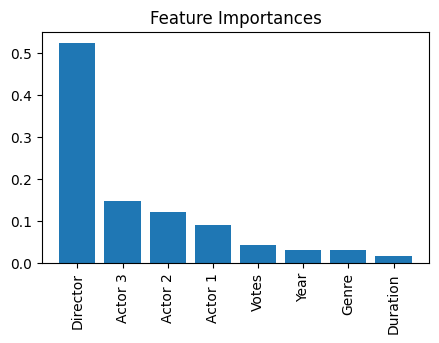

In [89]:
plt.figure(figsize=(5,3))
plt.title("Feature Importances")
plt.bar(x=feature_importances.index,height=feature_importances[0])
plt.xticks(rotation=90)

plt.show()

In [71]:
df.head(15)

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,1997,147,"Comedy, Drama, Music",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
5,2014,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
6,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
7,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
8,1991,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
9,2012,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


In [84]:
new_data = pd.DataFrame({'Year':[2015],'Duration':[115],\
                         'Genre':'Comedy,Drama','Votes':[7123],'Director':['Arshad siddiqui'],\
                         'Actor 1':['Vijay Raaz'],'Actor 2':['Bobby Deol'],'Actor 3':['Jackie Shroff'],})

In [85]:
new_data

,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
0,2015,115,"Comedy,Drama",7123,Arshad siddiqui,Vijay Raaz,Bobby Deol,Jackie Shroff


In [86]:
new_data = encoder.transform(new_data)
new_data.loc[:,:] = scaler.transform(new_data.loc[:,:])

In [87]:
new_data

,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
0,0.451613,-0.645161,0.015966,8.39976,-0.035761,1.3627,-0.444657,-0.239965


In [88]:
xgb_model.predict(new_data)

array([6.171168], dtype=float32)

XGBoost model predict 6.2 rating on new data which is close to the 7.4 of row 10 so its robust

it had an average score of 0.25 in cross validation and no big  differences between fold so no overfitting

it achieved an r2 score if 0.26